In [1]:
"""This module is meant to track the average temperatures of all months through years 1960-2024 """

'This module is meant to track the average temperatures of Jan through years 1960-2024 '

In [2]:
from class_ai import Temperature_Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Set up my Class
data = pd.read_excel("cleandata.xlsx", sheet_name=None)
tp = Temperature_Data(data)
years = tp.years
years = years[::-1]

In [4]:
### Stores the averaged temperature for a given month for a given year in matrix
highs = np.zeros((12,len(years)))
avgs = np.zeros((12,len(years)))
lows = np.zeros((12,len(years)))
months = np.arange(1,13)
for month in months:
    for i, year in enumerate(years):
        temp = np.mean(tp.collect_month(month,year,0))
        highs[month-1,i] = temp
        temp = np.mean(tp.collect_month(month,year,1))
        avgs[month-1,i] = temp
        temp = np.mean(tp.collect_month(month,year,2))
        lows[month-1,i] = temp
print("Completed.")

Completed.


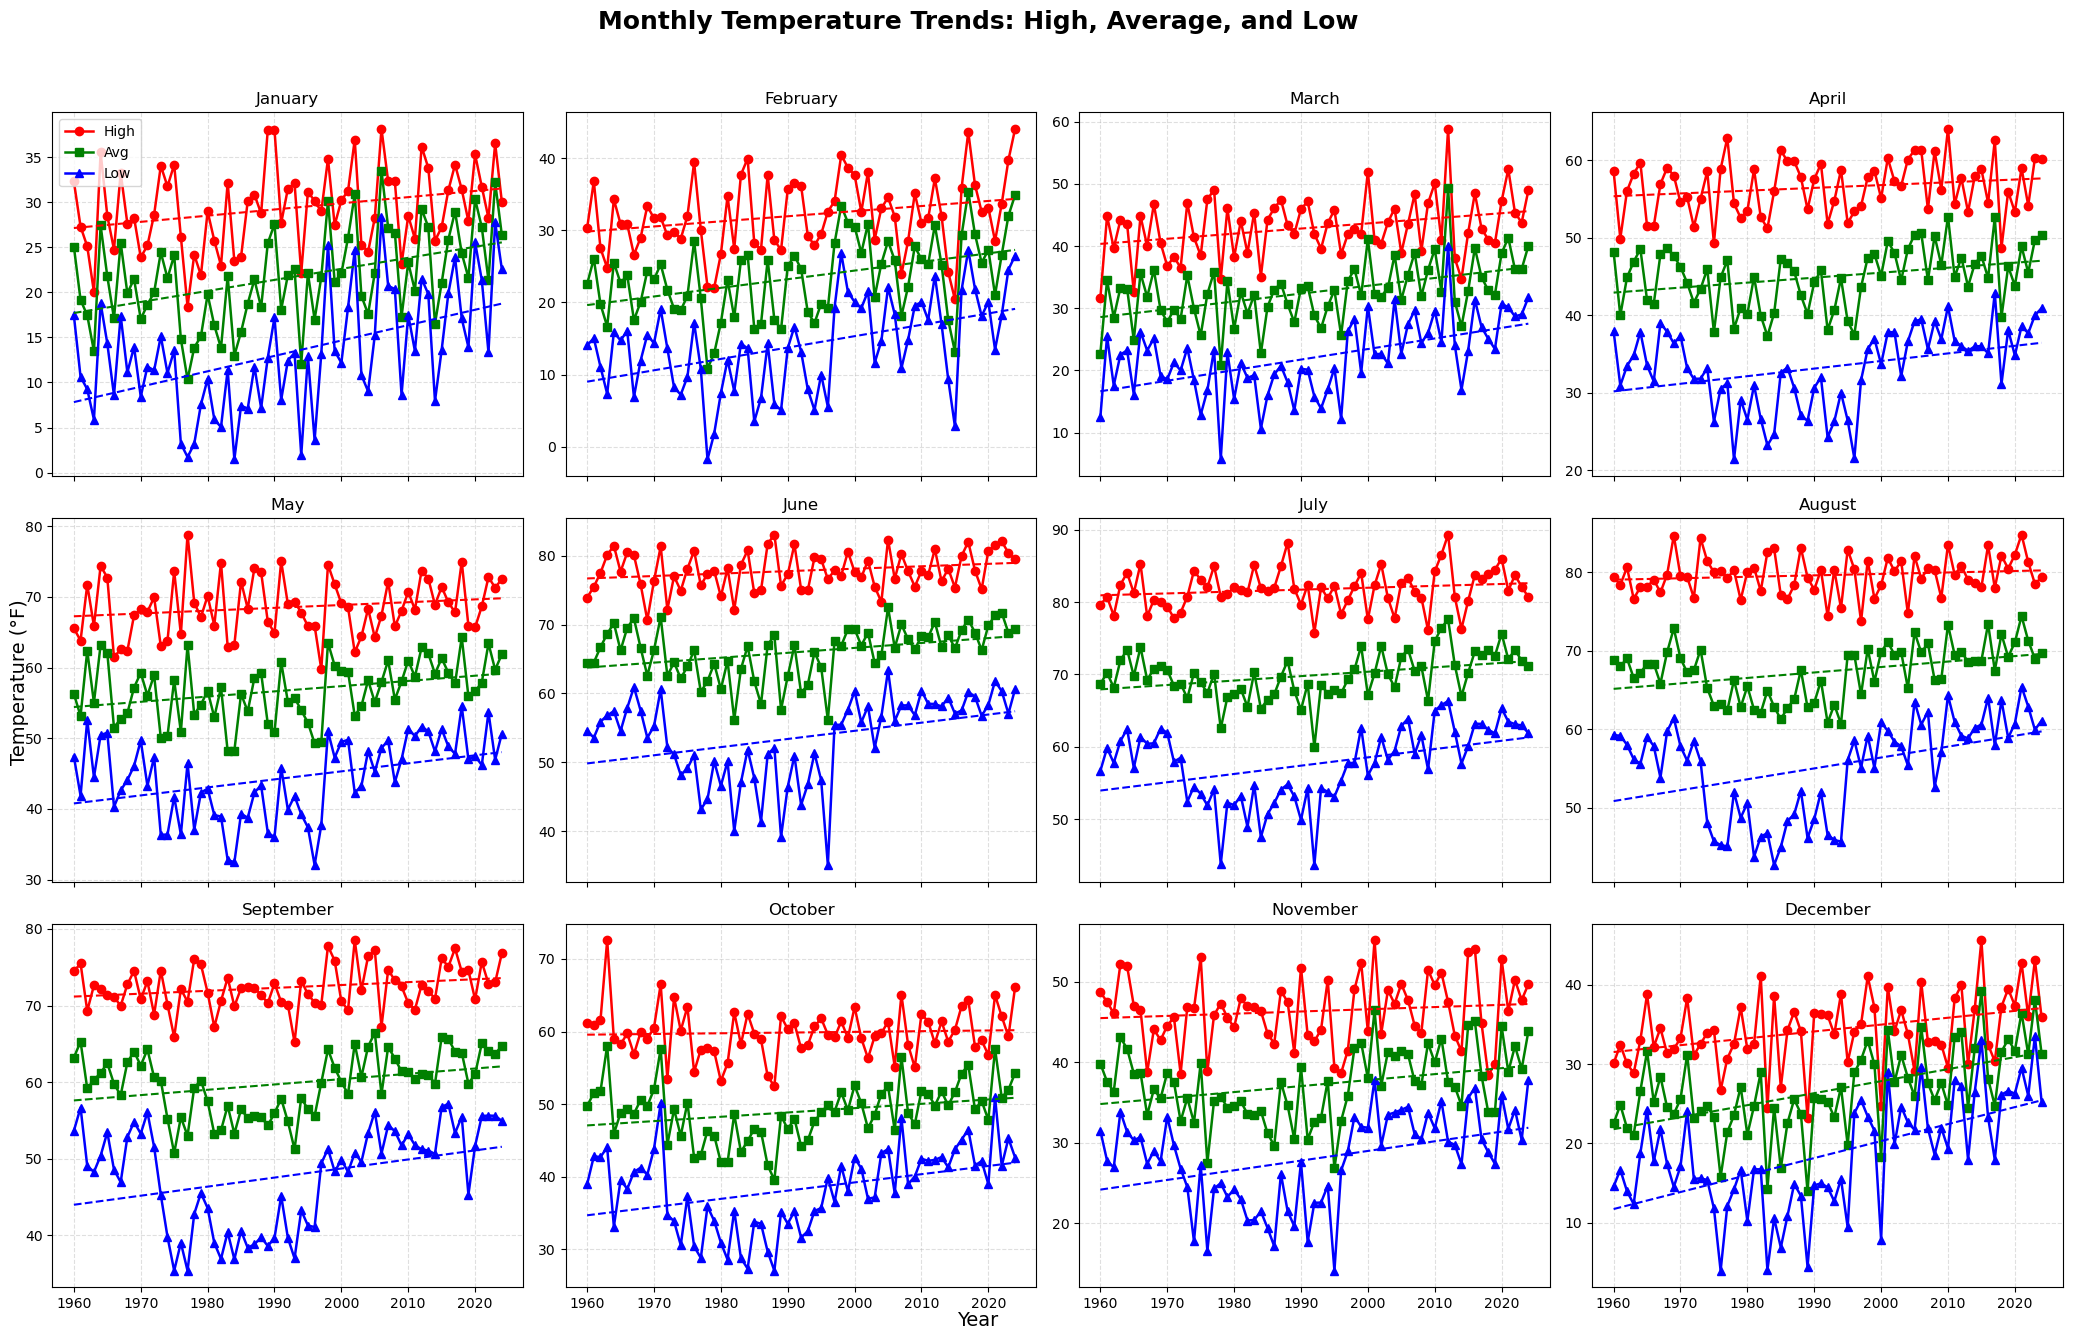

In [6]:
# Convert years to integers
x = np.array(years).astype(int)

# Month names for titles
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

# Set up the subplots: 3 rows × 4 columns
fig, axes = plt.subplots(3, 4, figsize=(22, 14), sharex=True, sharey=False)
fig.suptitle("Monthly Temperature Trends: High, Average, and Low", fontsize=18, weight='bold')

# Flatten axes array for easy looping
axes = axes.flatten()

for i in range(12):
    ax = axes[i]
    
    # Extract data for this month
    y_highs = highs[i, :]
    y_avgs = avgs[i, :]
    y_lows  = lows[i, :]
    
    # Plot raw data
    ax.plot(x, y_highs, color='red', linewidth=1.8, marker='o', label='High')
    ax.plot(x, y_avgs, color='green', linewidth=1.8, marker='s', label='Avg')
    ax.plot(x, y_lows,  color='blue', linewidth=1.8, marker='^', label='Low')
    
    # Add trend lines
    ax.plot(x, np.poly1d(np.polyfit(x, y_highs, 1))(x), color='red', linestyle='--')
    ax.plot(x, np.poly1d(np.polyfit(x, y_avgs, 1))(x), color='green', linestyle='--')
    ax.plot(x, np.poly1d(np.polyfit(x, y_lows, 1))(x),  color='blue', linestyle='--')
    
    ax.set_title(months[i], fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.4)

# Add one shared legend in the first subplot
axes[0].legend(loc='upper left', fontsize=10, frameon=True)

# Common labels
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=14)
fig.text(0.06, 0.5, 'Temperature (°F)', va='center', rotation='vertical', fontsize=14)

# Tidy layout
plt.tight_layout(rect=[0.06, 0.04, 1, 0.96])
plt.show()
